In [1]:
! #pip3 install -r ./requirements.txt

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from FileCounter import fileCount
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.functional as F
import numpy as np

import cv2

In [3]:
trainData = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
testData = 'asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [4]:
train_transforms =  transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(trainData, transform=train_transforms)
test_dataset = datasets.ImageFolder(testData, transform=test_transforms)

In [5]:
test_dataset[3]

(tensor([[[-2.0665, -1.8953, -1.8953,  ..., -1.5528, -1.5014, -1.8097],
          [-1.8610, -1.4329, -1.2959,  ...,  0.8447,  0.8104, -0.4397],
          [-1.8953, -1.2959, -1.1247,  ...,  1.2385,  1.2043, -0.1657],
          ...,
          [-1.7583, -0.1486,  0.1939,  ...,  0.3823,  0.3481, -0.7137],
          [-1.7240, -0.1486,  0.1768,  ...,  0.3481,  0.2967, -0.7479],
          [-1.9124, -0.9534, -0.7479,  ..., -0.7137, -0.7308, -1.3473]],
 
         [[-1.9482, -1.8957, -1.8431,  ..., -1.5280, -1.5805, -1.7381],
          [-1.9132, -1.4930, -1.3004,  ...,  0.7304,  0.6604, -0.4776],
          [-1.8606, -1.3179, -1.1779,  ...,  1.0805,  1.0280, -0.2500],
          ...,
          [-1.6331,  0.0301,  0.3627,  ...,  0.3452,  0.2927, -0.6527],
          [-1.6506,  0.0301,  0.3627,  ...,  0.2927,  0.2752, -0.6877],
          [-1.7906, -0.8102, -0.6176,  ..., -0.6527, -0.6702, -1.2129]],
 
         [[ 2.3960,  1.8905,  1.6640,  ...,  1.9951,  2.0997,  2.2217],
          [ 1.8383,  0.2348,

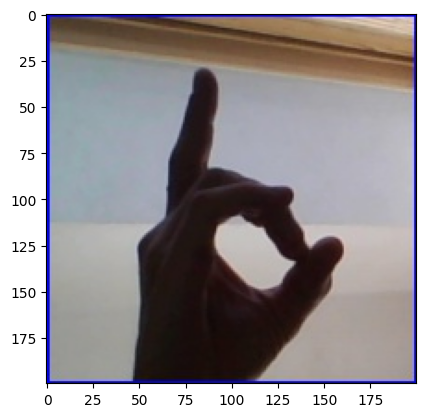

In [6]:
image = cv2.imread("asl-alphabet/asl_alphabet_test/asl_alphabet_test/D/D_test.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


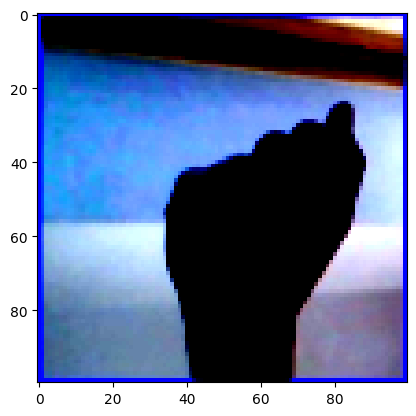

0


In [7]:
image, label = test_dataset[3]

plt.imshow(image.permute(1, 2, 0))
plt.show()
print(label)

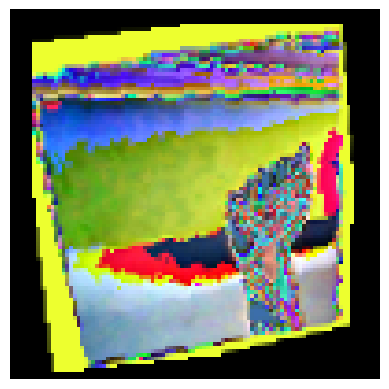

In [8]:
# Get an example image from the training dataset
example_idx = 0  # Choose the index of the example image
example_image, example_label = train_dataset[example_idx]

# Convert the tensor image to a PIL Image
example_image_pil = transforms.ToPILImage()(example_image)

# Apply the transformation to the example image
augmented_image = train_transforms(example_image_pil)

# Convert the augmented image tensor to a numpy array and transpose the dimensions
augmented_image = augmented_image.numpy().transpose(1, 2, 0)

# Denormalize the image by multiplying with the standard deviation and adding the mean
augmented_image = augmented_image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]

# Clip the pixel values to [0, 1] range
augmented_image = np.clip(augmented_image, 0, 1)

# Visualize the augmented image
plt.imshow(augmented_image)
plt.axis('off')
plt.show()


In [9]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


In [10]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(64 * 25 * 25, 128)
#         self.dropout = nn.Dropout(0.2)
#         self.fc2 = nn.Linear(128, 29)

#     def forward(self, x):
#         x = self.pool1(nn.functional.relu(self.conv1(x)))
#         x = self.pool2(nn.functional.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 25 * 25)
#         x = nn.functional.relu(self.fc1(x))
#         x = self.dropout(x) 
#         x = self.fc2(x)
#         return x


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 29)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = self.pool3(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 256 * 12 * 12)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

[1,   200] loss: 3.361
[1,   400] loss: 3.161
[1,   600] loss: 2.747
[1,   800] loss: 2.340
[1,  1000] loss: 2.054
[1,  1200] loss: 1.808
[1,  1400] loss: 1.658
[1,  1600] loss: 1.485
[1,  1800] loss: 1.373
[1,  2000] loss: 1.310
[1,  2200] loss: 1.199
Epoch [1] - Loss: 0.033, Accuracy: 36.38 %
[2,   200] loss: 1.106
[2,   400] loss: 1.038
[2,   600] loss: 0.992
[2,   800] loss: 0.914
[2,  1000] loss: 0.914
[2,  1200] loss: 0.865
[2,  1400] loss: 0.827
[2,  1600] loss: 0.815
[2,  1800] loss: 0.750
[2,  2000] loss: 0.746
[2,  2200] loss: 0.696
Epoch [2] - Loss: 0.019, Accuracy: 69.60 %
[3,   200] loss: 0.660
[3,   400] loss: 0.633
[3,   600] loss: 0.628
[3,   800] loss: 0.572
[3,  1000] loss: 0.586
[3,  1200] loss: 0.554
[3,  1400] loss: 0.536
[3,  1600] loss: 0.528
[3,  1800] loss: 0.520
[3,  2000] loss: 0.489
[3,  2200] loss: 0.491
Epoch [3] - Loss: 0.014, Accuracy: 80.80 %
[4,   200] loss: 0.463
[4,   400] loss: 0.452
[4,   600] loss: 0.430
[4,   800] loss: 0.428
[4,  1000] loss: 0.4

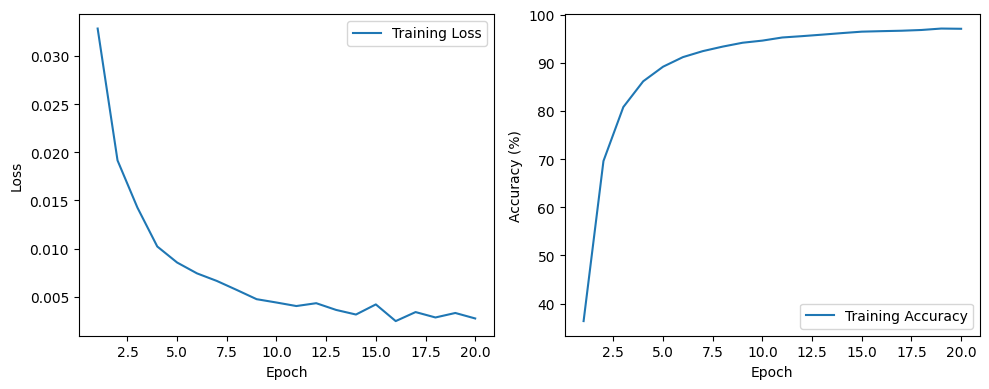

In [11]:
net = CNN()
# Move model and data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

# Step 4: Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

train_loss_history = []
train_accuracy_history = []

for epoch in range(20):
    net.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move data to GPU

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    # Compute and store the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)

    print('Epoch [%d] - Loss: %.3f, Accuracy: %.2f %%' % (epoch + 1, epoch_loss, epoch_accuracy))


    if epoch % 5 == 0:  # Visualize activation maps every few epochs
        sample_inputs, _ = next(iter(trainloader))  # Get a batch of input samples
        sample_inputs = sample_inputs.to(device)  # Move inputs to the same device as the model

        activation = net.conv1(sample_inputs)  # Pass the inputs through the 'conv1' layer
        activation = torch.mean(activation, dim=1, keepdim=True)  # Take the mean across channels
        activation_map = F.to_pil_image(activation[0].detach().cpu())  # Convert tensor to PIL image
        # Save the activation map as an image file
        activation_map.save(f'activation_map_epoch_{epoch}.png')
print('Finished Training')

# Plot the loss and accuracy curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy_history) + 1), train_accuracy_history, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Step 5: Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # move data to GPU
        outputs = net(images)
        outputs = nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 89 %
